<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/secondoEsperimentoMiky_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [9]:
# Prendo i dati che mi servono dei ristoranti

#Osservazione: prendo il totale complessivo non il totale della categoria 

import numpy as np

# elimino dal dataframe le righe che non sono state riconosciute e presentano questa scritta
res = res[((res.age != 'Not recognized'))]
# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)

# df con le età minori di 40
res_u40 = res[(res['age'] < 40)]
# df con le età maggiori di 40
res_o40 = res[(res['age'] > 40)]

# df con le donne di età minore di 40
women_u40 = (res_u40['gender'] == 'feminine')
# df con le donne di età maggiore di 40
women_o40 = (res_o40['gender'] == 'feminine')
# df con gli uomini di età minore di 40
men_u40 = (res_u40['gender'] == 'masculine')
# df con gli uomini di età maggiore di 40
men_o40 = (res_o40['gender'] == 'masculine')

positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'

# AMERICAN

totaleTupelo = len(res[(res['restaurant'] == 'TupeloHoney')])
totaleCravings = len(res[(res['restaurant'] == 'CravingsBuffet')])
totaleCulinary = len(res[(res['restaurant'] == 'CulinaryDropout')])

totAmericanUsers = totaleTupelo + totaleCravings + totaleCulinary

restaurant_typology = 'American'
typology = len(res[(res['typology'] == '%s' % restaurant_typology)])

# POSITIVI
# numero medio di donne e uomini al di sopra e al di sotto dei 40 annni sul totale degli utenti per tipologia di ristorante
women_u40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (positive)]) * 100) / totAmericanUsers
women_o40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (positive)]) * 100) / totAmericanUsers
men_u40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (positive)]) * 100) / totAmericanUsers
men_o40_american_positive = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (positive)]) * 100) / totAmericanUsers


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
women_u40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (negative)]) * 100) / totAmericanUsers
women_o40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (negative)]) * 100) / totAmericanUsers
men_u40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (negative)]) * 100) / totAmericanUsers
men_o40_american_negative = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (negative)]) * 100) / totAmericanUsers


# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
women_u40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_u40) & (neutral)]) * 100) / totAmericanUsers
women_o40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (women_o40) & (neutral)]) * 100) / totAmericanUsers
men_u40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_u40) & (neutral)]) * 100) / totAmericanUsers
men_o40_american_neutral = (len(res[(res['typology'] == '%s' % restaurant_typology) & (men_o40) & (neutral)]) * 100) / totAmericanUsers



/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


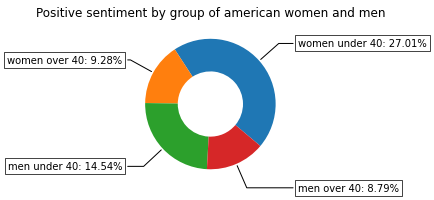

In [25]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# percentuali
percentuale_women_u40 = "{:.2%}".format(women_u40_american_positive/100)
percentuale_women_o40 = "{:.2%}".format(women_o40_american_positive/100)
percentuale_men_u40 = "{:.2%}".format(men_u40_american_positive/100)
percentuale_men_o40 = "{:.2%}".format(men_o40_american_positive/100)

recipe = ["women under 40: " + "%s" % percentuale_women_u40,
          "women over 40: " + "%s" % percentuale_women_o40,
          "men under 40: " + "%s" % percentuale_men_u40,
          "men over 40: " + "%s" % percentuale_men_o40]

# GRAFICO PER POSITIVI AMERICANI

data = [women_u40_american_positive, women_o40_american_positive, men_u40_american_positive, men_o40_american_positive]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Positive sentiment by group of american women and men")

plt.show()


In [ ]:
-----------------------------------------------------------------------------------------------------------
# Costruisco il grafico

labels = ['AmericanRestaurants', 'AsianRestaurants', 'MexicanRestaurants']

# GRAFICO PER ASIATICI

asianPositive = [asian_american_positive, asian_asian_positive, asian_mexican_positive]
asianNegative = [asian_american_negative, asian_asian_negative, asian_mexican_negative]
asianNeutral = [asian_american_neutral, asian_asian_neutral, asian_mexican_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, asianPositive, width, label='positive')
rects2 = ax.bar(x, asianNegative, width, label='negative')
rects3 = ax.bar(x + width, asianNeutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiment_analysis')
ax.set_title('Asian sentiment by group of restaurant typology')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()